In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
hp_train = pd.read_csv("train.csv")

In [6]:
hp_train.columns;
len(hp_train.columns)

81

## 初步分析房价


In [7]:
hp_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

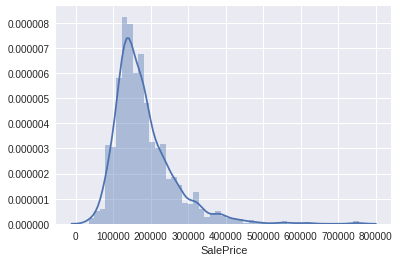

In [8]:
sns.distplot(hp_train['SalePrice'])

### 说明
- 偏离正态分布
- 数据正偏
- 有峰值

## 关系分析
### 1.相关系数矩阵

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

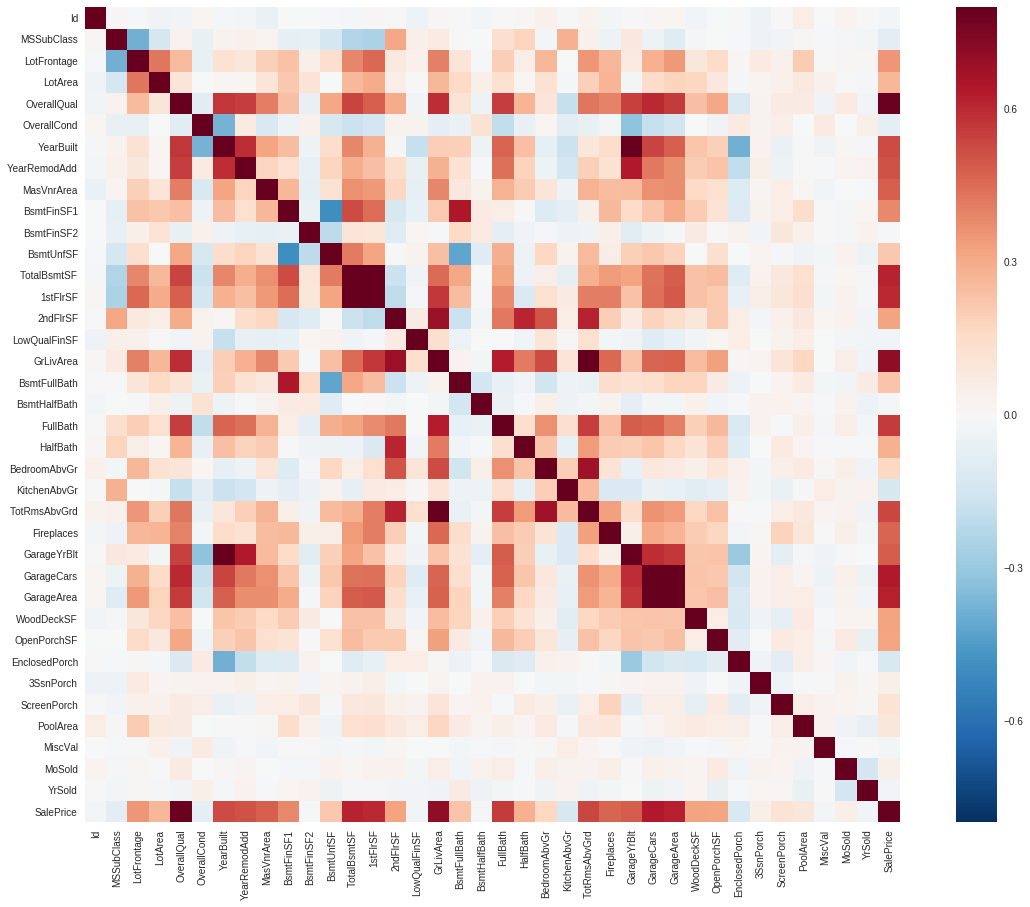

In [9]:
corr_mat = hp_train.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_mat, vmax=.8, square=True);

corr_price = corr_mat["SalePrice"]
corr_price[np.argsort(corr_price, axis=0)[::-1]]

### 说明：
#### 1.与房价相关度高的变量：(>0.5)
- OverallQual      0.790982
- GrLivArea        0.708624
- GarageCars       0.640409
- GarageArea       0.623431
- TotalBsmtSF      0.613581
- 1stFlrSF         0.605852
- FullBath         0.560664
- TotRmsAbvGrd     0.533723
- YearBuilt        0.522897
- YearRemodAdd     0.507101

#### 2.相关性度高的变量整合：
- GrLiveArea和TotRmsAbvGrd以及FullBath（地上房间总数，地上生活面积，地上全套卫浴）
- GarageCars和GarageArea以及GarageYrBlt （车库容量，车库面积，车库建造年限）
- TotalBsmtSF和1stFlrSF（地下室整体面积和一楼整体面积）
- YearBuilt和GarageYrBlt以及YearRemodAdd（车库建造年限和住宅建造年限，改装年限）
变量之间相关性高说明可能表示得是类似的含义，所以可以整合为一个变量或者选取与房价相关性更高的变量为代表

#### 3.选取主要变量：
- OverallQual      0.790982
- GrLivArea        0.708624
- GarageCars       0.640409
- TotalBsmtSF      0.613581
- FullBath         0.560664
- YearBuilt        0.522897

### 2.相关变量之间散点图

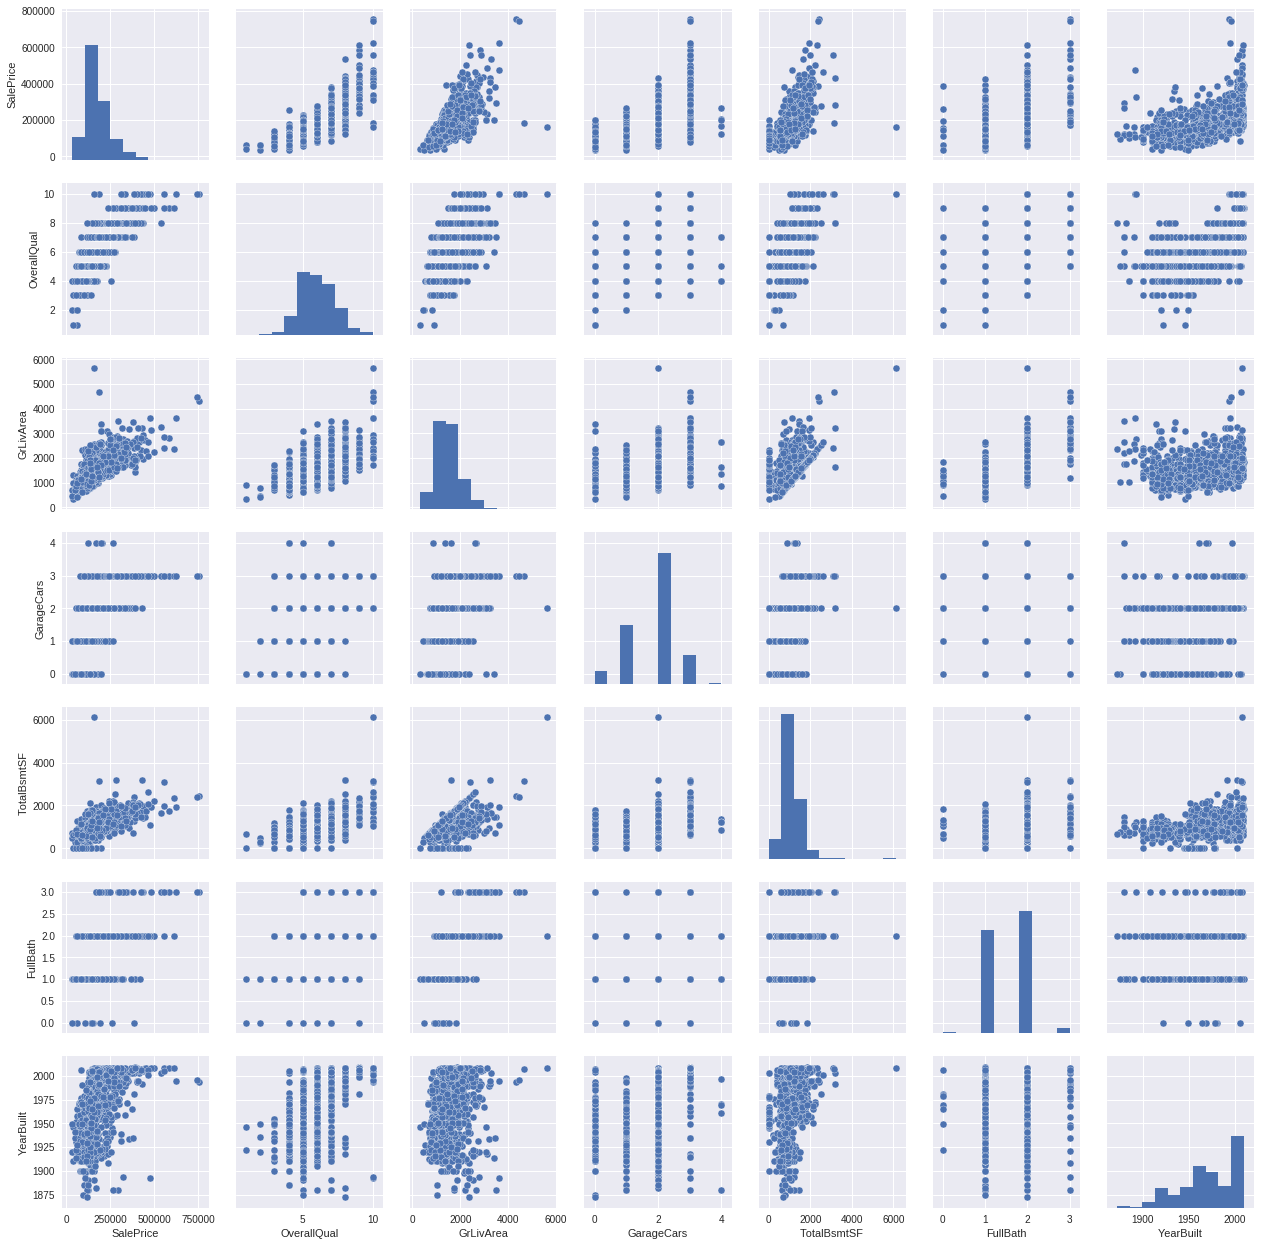

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(hp_train[cols], size = 2.5)

## 房价相关变量分析
### 数字型变量关系分析：
### 1.‘GrLivArea’ 与 ‘SalePrice’ 散点图

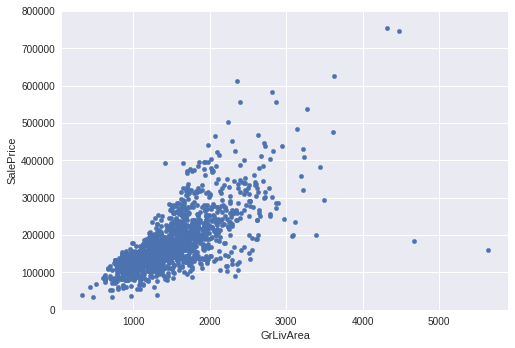

In [11]:
var = "GrLivArea"
data = pd.concat([hp_train["SalePrice"], hp_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

### 说明：
GrLivArea和SalePrice的关系密切，类似于线性关系；

也可以理解，地上生活区的面积和房价应该直接相关

### 2. ‘TotalBsmtSF’ 与 ‘SalePrice’散点图

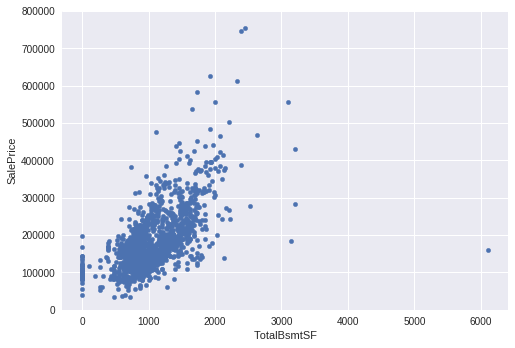

In [12]:
var = "TotalBsmtSF"
data = pd.concat([hp_train["SalePrice"], hp_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

### 说明：
TotalBsmtSF和SalePrice关系密切，类似于指数关系，存在为0时的特例情况
地下室总面积和房价也是直接相关的

### 与类别型变量的关系

### 1.‘OverallQual’与‘SalePrice’箱型图

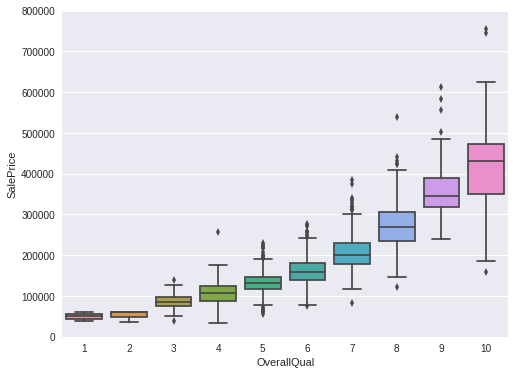

In [13]:
var = 'OverallQual'
data = pd.concat([hp_train['SalePrice'], hp_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

### 箱线图： 上边缘，上四分位数，中位数，下四分位数，下边缘，异常值
### 说明：
整体质量高的，房价也高

### 2.‘YearBuilt’与‘SalePrice’箱型图

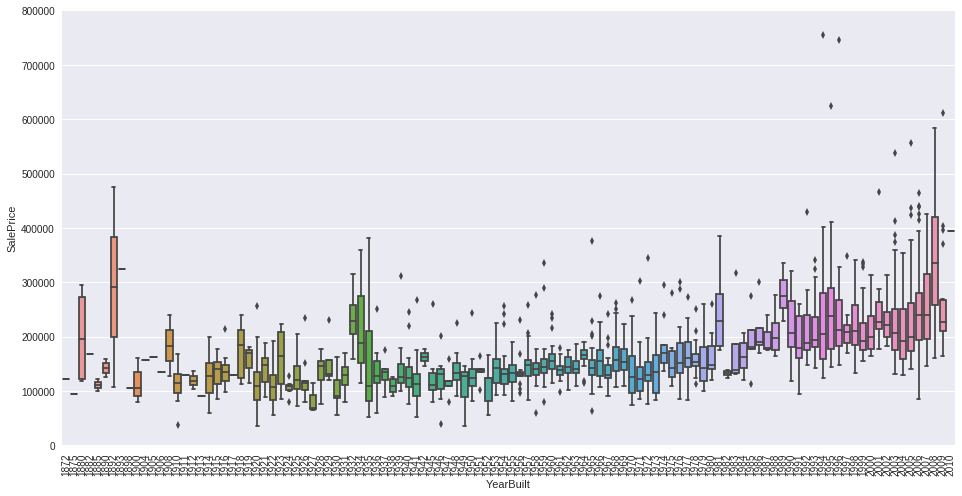

In [14]:
var = 'YearBuilt'
data = pd.concat([hp_train['SalePrice'], hp_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);plt.xticks(rotation=90);

### 说明：
没有明显规律，但是建造年份较短和很长的房价更高（旧的可能有收藏或者拆迁意义）

同时结合上面的散点图可得，点云下端基本呈指数分布

## 缺失数据

In [15]:
total= hp_train.isnull().sum().sort_values(ascending=False)
percent = (hp_train.isnull().sum()/hp_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### 说明：
1. 缺失值太多直接删去当前变量：PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage
2. Garage * 系列变量缺失值相同,而且车库系列和房价最重要的信息由GarageCar表达，所以也可删除
3. Bsmt * 系列与房价相关度不高，也可删去
4. MasVnrArea, MasVnrTYpe和房价相关度不高，而且与OverAllQual相关，故也可删去
5. Electrical将缺失值删去即可

In [16]:
hp_train= hp_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
hp_train= hp_train.drop(hp_train.loc[hp_train['Electrical'].isnull()].index)
hp_train.isnull().sum().max()

0

说明：缺失值已经处理完了

## 异常值处理

通过观察前面相关变量之间的散点图可发现，SalePrice和GrLivArea以及TotalBsmtSF存在明显的异常点

### 1. ‘GrLivArea’和’SalePrice’的异常值

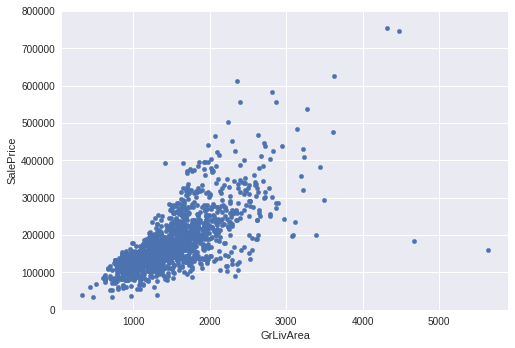

In [17]:
var = 'GrLivArea'
data = pd.concat([hp_train["SalePrice"], hp_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

### 说明：
- 右边两个明显的离群点，不符合点云趋势，判定为异常点
- 顶端两个离群点，因为基本符合点云趋势，判定为正常点

In [18]:
hp_train.sort_values(by="GrLivArea", ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [19]:
hp_train = hp_train.drop(hp_train[hp_train["Id"]==1299].index)
hp_train = hp_train.drop(hp_train[hp_train["Id"]==524].index)

### 2. ‘TotalBsmtSF’和’SalePrice’的异常值

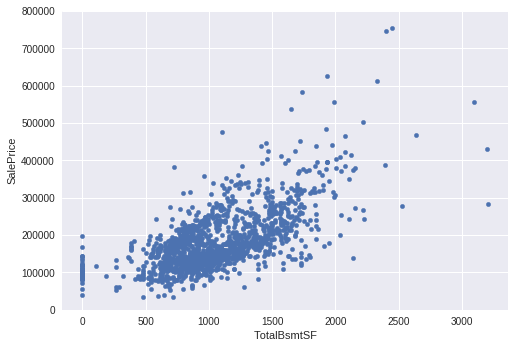

In [20]:
var = "TotalBsmtSF"
data = pd.concat([hp_train["SalePrice"], hp_train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

### 说明：
- 发现原本最右边的离群点已经被去掉，所以可以不用处理

## 变量正态性分析
- 直方图 – 峰度和偏度。
- 正态概率图   – 数据分布应紧密跟随代表正态分布的对角线。

### 1.SalePrice
绘制直方图和正态概率图

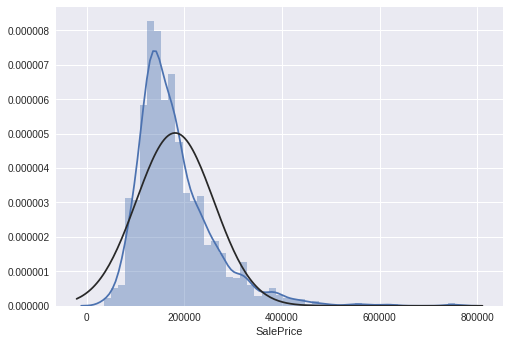

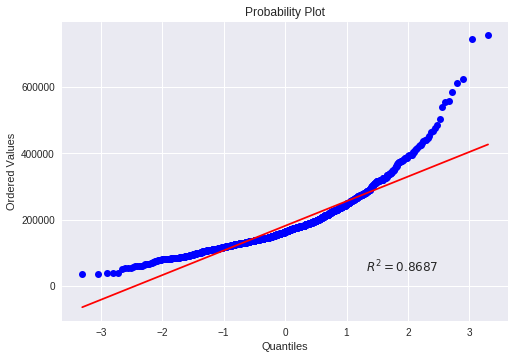

In [22]:
sns.distplot(hp_train['SalePrice'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(hp_train['SalePrice'], plot=plt)

使用对数变换，并绘制变换后的直方图和正态概率图

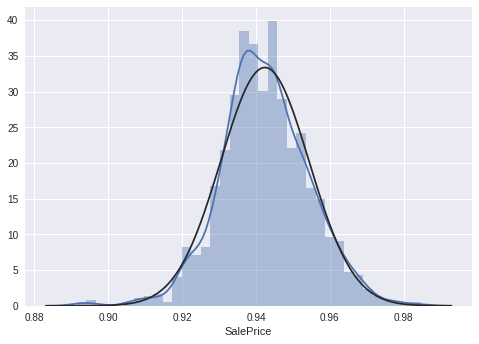

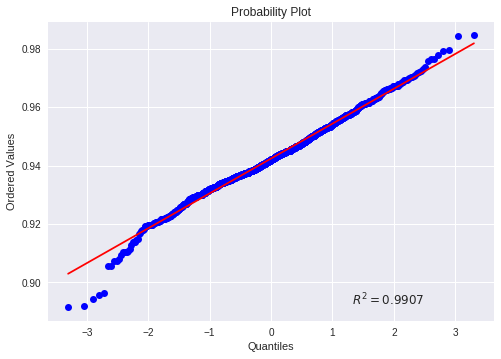

In [48]:
hp_train["SalePrice"] = np.log(hp_train["SalePrice"])
sns.distplot(hp_train["SalePrice"], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(hp_train["SalePrice"], plot=plt)

### 2.GrLivArea
绘制直方图和正态概率图

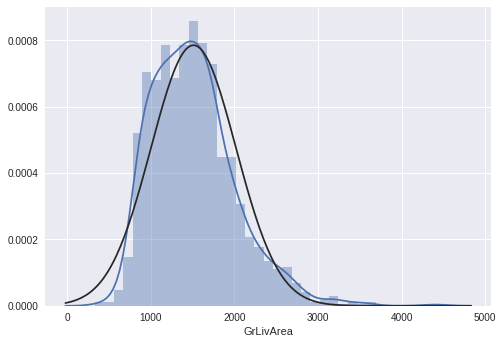

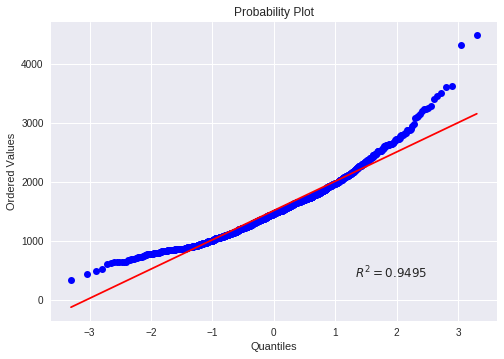

In [24]:
sns.distplot(hp_train['GrLivArea'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(hp_train['GrLivArea'], plot=plt)

使用对数变换，并绘制变换后的直方图和正态概率图

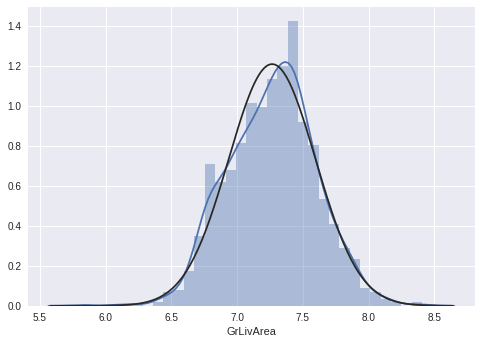

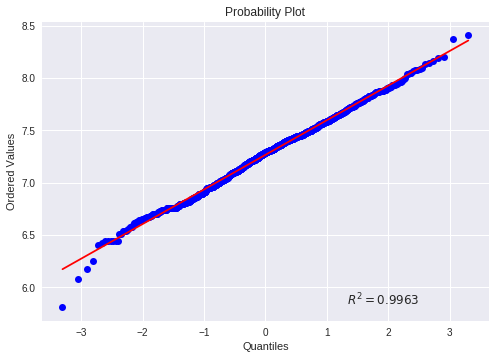

In [25]:
hp_train["GrLivArea"] = np.log(hp_train["GrLivArea"])
sns.distplot(hp_train["GrLivArea"], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(hp_train["GrLivArea"], plot=plt)

### 3. TotalBsmtSF
绘制直方图和正态概率图

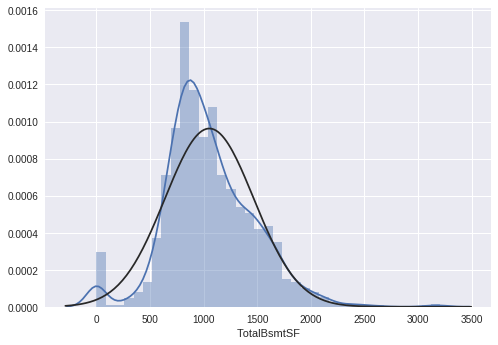

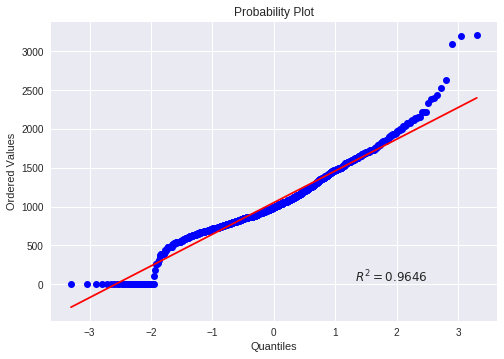

In [26]:
sns.distplot(hp_train['TotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(hp_train['TotalBsmtSF'], plot=plt)

### 说明：
- 存在大量为0的值
- 0无法对数转换

所以，选择忽略零值，只对非零值进行对数变换

In [27]:
hp_train['HasBsmt']= pd.Series(len(hp_train['TotalBsmtSF']), index=hp_train.index)
hp_train['HasBsmt'] = 0 
hp_train.loc[hp_train['TotalBsmtSF']>0,'HasBsmt'] = 1

使用对数变换，并绘制变换后的直方图和正态概率图

In [46]:
print(len(np.log(hp_train.loc[hp_train['HasBsmt']==1,'TotalBsmtSF'])))
hp_train["TotalBsmtSF"] = [ np.log(i) for i in hp_train["TotalBsmtSF"] if i>0 else i]
sns.distplot(hp_train["TotalBsmtSF"], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(hp_train["TotalBsmtSF"], plot=plt)

1420


ValueError: Length of values does not match length of index